# Libraries and Custom Functions

In [1]:
%%time
import pandas as pd
from itertools import groupby
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from pandas import *
from decimal import *
import xgboost as xgb
from vecstack import stacking
from vecstack import StackingTransformer
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score, make_scorer
import math
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from xgboost import XGBRegressor
from vecstack import StackingTransformer
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

#Custom functions
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

def Treatment_1(name):
    global ID
    df = pd.read_csv(name, sep=";", header=None)
    df.columns = df.iloc[0, :].tolist()
    df = df.drop(0, axis = 0).reset_index(drop = True)
    ID = df.id
    df = df.drop('id', axis =  1)
    return df

def Treatment_2(df):
    lb_make = LabelEncoder()      #Let's transform our string categorical data to numeric categorical data !    
    label_list = df.columns[5:7].tolist()
    wa = df.columns[7]
    numeric_list = df.columns[~df.columns.isin(df.columns[5:8])].tolist()
    for x in df.columns: 
        for w in df.index:
            if x in numeric_list:
                if df[x][w] == 'unknown':
                    df[x][w] = 0
            elif x in wa:
                df[x][w] = df[x][w][0]
            elif x in label_list:
                df[str(x)+'_encoded'] = lb_make.fit_transform(df[x])
    if 'market_share' in df.columns.tolist():
        df = df.drop('market_share', axis = 1)
    df = df.drop(label_list, axis = 1)
    for x in df.columns:
        df[x] = df[x].astype(float)    
    return df

def Treatment_3(df):
    for x, y in zip(df.prod_cost, df.index):
        rep = math.isnan(df.prod_cost[y])
        if rep == True or x == 0 or x < 0:
            df['prod_cost'][y] = df['prod_cost'].mean()
    return df

#Files    
name_1 = 'mower_market_snapshot.csv'
name_2 = 'submission_set.csv'

ModuleNotFoundError: No module named 'sklearn'

In [137]:
pd.read_csv(name_1, sep=";", header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
1,10.492623311991721,0.04252798088681092,18377,633.7665842034021,828.8021034855201,195.03551928211797,auto-portee,Low,3ans,0.006360041749060895,0.6506482608150532
2,20.273730444538863,0.037896368225955296,19363,731.5768165928985,882.894915941766,151.31809934886763,auto-portee,Low,3 ans.,0.006840423036959984,0.6997924743016689
3,20.19045691648912,0.039111245954194296,19641,741.2182024972648,919.3555217086142,178.13731921134948,auto-portee,Low,3_ans,0.0061790166010061475,0.6321289330507346
4,27.220131037450034,0.04130311679867133,18728,654.2556353742241,817.0850969501104,162.82946157588628,auto-portee,Low,3 anss,0.007924828620013936,0.8107298917700951
5,16.370911056135107,0.037938171867880455,18722,703.0945265657465,844.5814645266526,141.48693796090603,auto-portee,Medium,3ans.,0.007405626037658374,0.7576141622593239
6,19.548212909002086,0.035428092007083675,18268,728.2846172351572,905.2975029654891,177.01288573033196,auto-portee,Medium,3 ans,0.007595620647289617,0.7770510884931896
7,12.242635494647624,0.03549164468149561,18448,757.3512858799036,930.615021607817,173.26373572791334,auto-portee,Hight,3_ans.,0.007488141434587315,0.7660556948184783
8,8.676313646712744,0.042065635322025,18943,633.5154494204178,818.0755906101691,184.56014118975136,auto-portee,Low,3 anss,0.005291343413692117,0.5413177342746714
9,15.26418049511829,0.038804178185440595,19640,646.6265667713467,816.7740281201634,170.14746134881673,auto-portee,Low,3_ans.,0.006063175222973637,0.6202780688392848


In [136]:
pd.read_csv(name_2, sep=";", header=None)

,0,1,2,3,4,5,6,7,8
0,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty
1,21.313063800841288,0.03792781797895729,20049,613.0617618630818,768.160604890966,155.09884302788427,auto-portee,Medium,3 ans
2,25.797234060134517,0.038663963701407005,19699,701.3216077151048,865.7275397711709,164.405932056066,auto-portee,Low,3 ans
3,14.314083325212422,0.0431181216522151,19704,654.1474975777737,807.3741576340544,153.22666005628074,auto-portee,Low,3 ans
4,29.754389588650017,0.03855058797372652,20072,669.0832392823254,866.5739543199292,197.49071503760382,auto-portee,Low,3 ans
5,24.915115505788485,0.03882929346392417,20183,675.3132205876365,859.2057915283639,183.8925709407274,auto-portee,Low,3 ans
6,20.202288497686627,0.03794156177767397,19967,669.1541607544888,805.1166317604847,135.9624710059959,auto-portee,Low,3 ans
7,25.91785164400127,0.033390234638945616,20046,718.8883696033964,877.7615174976632,158.87314789426685,auto-portee,Hight,3 ans
8,14.468300430623623,0.029200786411633657,19897,695.5989001901153,852.935727455415,157.3368272652997,auto-portee,Medium,3 ans
9,18.590439074451634,0.04026563998197258,20160,672.4453081046314,821.4453265073417,149.00001840271037,auto-portee,Low,3 ans


The next step is to create our dataframe : 

In [138]:
df_main = Treatment_1(name_1)
df_main

,capacity,failure_rate,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
0,10.492623311991721,0.04252798088681092,633.7665842034021,828.8021034855201,195.03551928211797,auto-portee,Low,3ans,0.006360041749060895,0.6506482608150532
1,20.273730444538863,0.037896368225955296,731.5768165928985,882.894915941766,151.31809934886763,auto-portee,Low,3 ans.,0.006840423036959984,0.6997924743016689
2,20.19045691648912,0.039111245954194296,741.2182024972648,919.3555217086142,178.13731921134948,auto-portee,Low,3_ans,0.0061790166010061475,0.6321289330507346
3,27.220131037450034,0.04130311679867133,654.2556353742241,817.0850969501104,162.82946157588628,auto-portee,Low,3 anss,0.007924828620013936,0.8107298917700951
4,16.370911056135107,0.037938171867880455,703.0945265657465,844.5814645266526,141.48693796090603,auto-portee,Medium,3ans.,0.007405626037658374,0.7576141622593239
5,19.548212909002086,0.035428092007083675,728.2846172351572,905.2975029654891,177.01288573033196,auto-portee,Medium,3 ans,0.007595620647289617,0.7770510884931896
6,12.242635494647624,0.03549164468149561,757.3512858799036,930.615021607817,173.26373572791334,auto-portee,Hight,3_ans.,0.007488141434587315,0.7660556948184783
7,8.676313646712744,0.042065635322025,633.5154494204178,818.0755906101691,184.56014118975136,auto-portee,Low,3 anss,0.005291343413692117,0.5413177342746714
8,15.26418049511829,0.038804178185440595,646.6265667713467,816.7740281201634,170.14746134881673,auto-portee,Low,3_ans.,0.006063175222973637,0.6202780688392848
9,16.19054459695368,0.034045454119674474,628.6733599514768,814.7996502793841,186.1262903279073,auto-portee,Low,3_ans.,0.005699927467576098,0.5831169102149285


In [139]:
#Here is some data format issues
df_main.dtypes

capacity          object
failure_rate      object
margin            object
price             object
prod_cost         object
product_type      object
quality           object
warranty          object
market_share      object
attractiveness    object
dtype: object

In [140]:
#Let's apply some other treatments
df_main = Treatment_2(df_main)

/var/dlk/lib/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [141]:
#New types
df_main.dtypes

capacity                float64
failure_rate            float64
margin                  float64
price                   float64
prod_cost               float64
warranty                float64
attractiveness          float64
product_type_encoded    float64
quality_encoded         float64
dtype: object

In [142]:
df_main['attractiveness'].mean()

0.6365068156861926

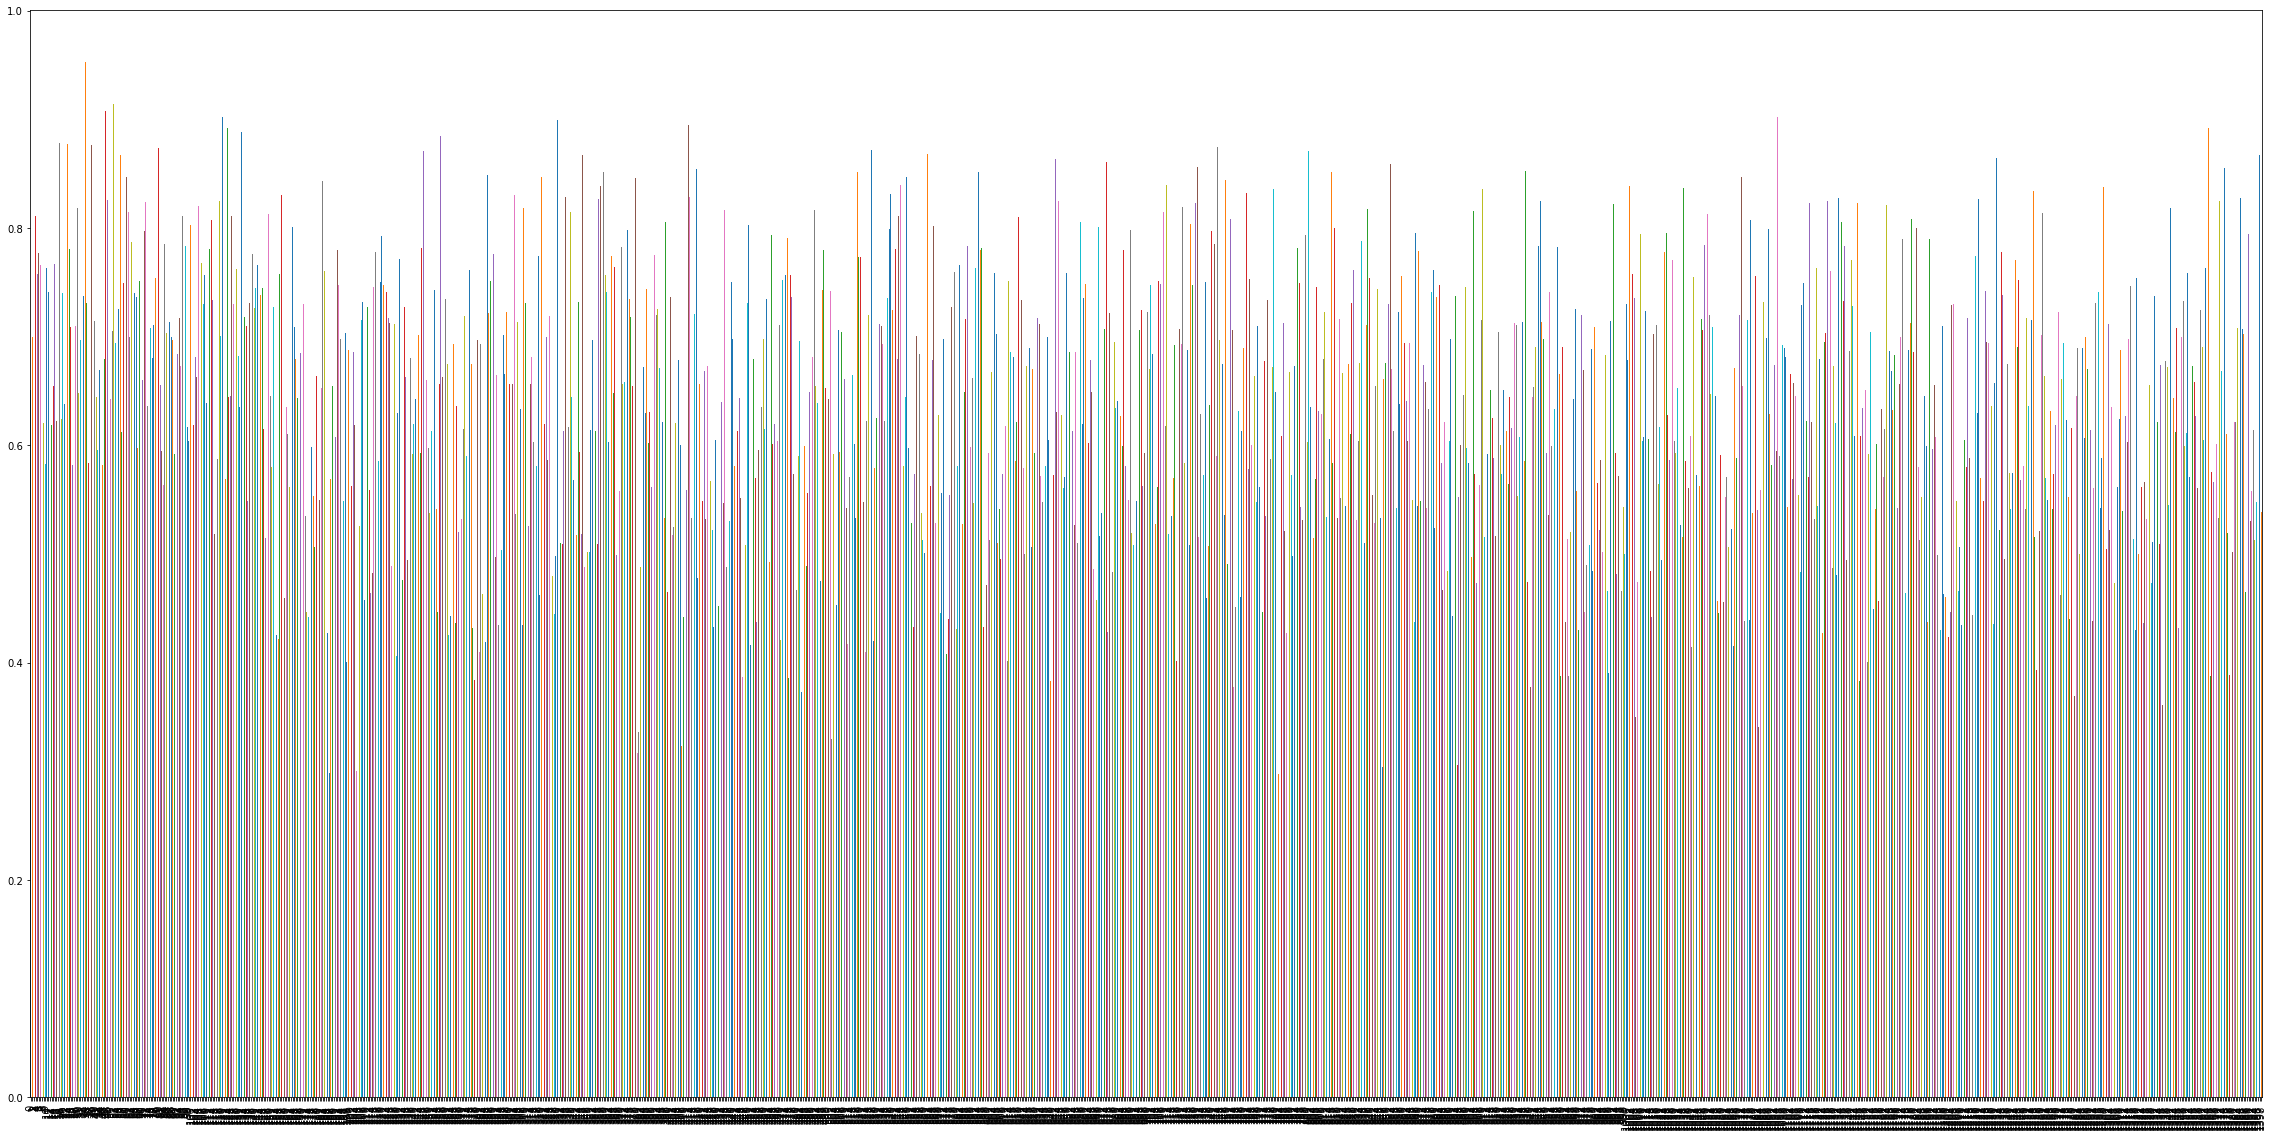

In [143]:
#Let vizualise the distribution of our label variable
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(40,20))
df_main['attractiveness'].plot.bar(ylim = 0)
plt.show()

In [144]:
df_main.describe()
#Let's say we have a little problems with the production cost variable
#First one : Negative cost is not possible
#Second one : There are some NaN values -> count = 1381

,capacity,failure_rate,margin,price,prod_cost,warranty,attractiveness,product_type_encoded,quality_encoded
count,1399.000000,1399.000000,1399.000000,1399.000000,1381.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,47.663266,0.166448,186.262609,260.075165,54.912410,1.498213,0.636507,1.501787,1.115797
std,19.840501,0.073605,191.011102,259.949127,61.418106,0.673293,0.124016,0.673293,0.541048
min,0.013884,0.028906,52.943989,62.162200,-64.000000,1.000000,0.297384,0.000000,0.000000
25%,35.853890,0.095678,62.247602,73.379425,10.644263,1.000000,0.549369,1.000000,1.000000
50%,50.309242,0.199796,66.299672,78.439753,12.104509,1.000000,0.641351,2.000000,1.000000
75%,61.905015,0.228011,265.370973,384.265263,113.496210,2.000000,0.726746,2.000000,1.000000
max,104.614865,0.302465,790.012898,964.973926,210.984941,3.000000,0.952877,2.000000,2.000000


In [145]:
#Let's do more treatments :)
df_main = Treatment_3(df_main)

In [146]:
#No more NaN values
df_main.describe()

,capacity,failure_rate,margin,price,prod_cost,warranty,attractiveness,product_type_encoded,quality_encoded
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,47.663266,0.166448,186.262609,260.075165,57.803649,1.498213,0.636507,1.501787,1.115797
std,19.840501,0.073605,191.011102,259.949127,58.839839,0.673293,0.124016,0.673293,0.541048
min,0.013884,0.028906,52.943989,62.162200,7.095443,1.000000,0.297384,0.000000,0.000000
25%,35.853890,0.095678,62.247602,73.379425,10.856096,1.000000,0.549369,1.000000,1.000000
50%,50.309242,0.199796,66.299672,78.439753,12.547161,1.000000,0.641351,2.000000,1.000000
75%,61.905015,0.228011,265.370973,384.265263,113.097207,2.000000,0.726746,2.000000,1.000000
max,104.614865,0.302465,790.012898,964.973926,210.984941,3.000000,0.952877,2.000000,2.000000


In [147]:
feat_list = df_main.columns[~df_main.columns.isin(df_main.columns[6:7])].tolist()
features = df_main[feat_list]
labels = df_main['attractiveness']

In [148]:
#Cross Validation step
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_main.index, test_size=0.1, random_state=0)

In [149]:
pd.DataFrame(y_test).describe()

,attractiveness
count,140.000000
mean,0.638477
std,0.128733
min,0.340610
25%,0.544169
50%,0.645831
75%,0.735180
max,0.952877


In [150]:
#Creation of a scorer which be usefull for next steps
reg_scorer = make_scorer(rmsle)
reg_scorer

make_scorer(rmsle)

GradientBoostingRegressor regression...
Best Params:
{'learning_rate': 0.1, 'max_depth': 1, 'max_features': 1, 'n_estimators': 500, 'subsample': 1}
RMSLE: 
0.054165791586685844
[0.118 0.11  0.136 0.148 0.106 0.112 0.12  0.15 ]
RandomForestRegressor regression...
Best Params:
{'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 350}
RMSLE: 
0.0676831630335362
[0.08972986 0.12174678 0.24694083 0.2892959  0.08627299 0.06089265
 0.0759167  0.0292043 ]


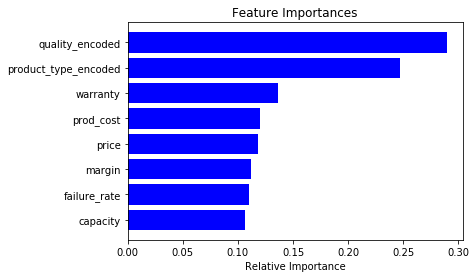

In [151]:
#Let's compute two ensemble models with some parameters customization
%matplotlib inline

gbr = GradientBoostingRegressor(random_state=0)
rf = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)

models = [gbr, rf]

param_grid_gbr = {
    'n_estimators': [500 ,800, 1200],
    'max_features': [1, 2, 4, None],
    'max_depth': [1, 2, 10],
    'learning_rate': [0.1],
    'subsample': [1]
}
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [3, 5, 6],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [350, 400, 450]
}
params = [param_grid_gbr,  param_grid_rf]
stock = []
for model, p in zip(models, params):
    model_name = model.__class__.__name__
    modell = GridSearchCV(estimator=model, param_grid=p, n_jobs=1, cv=10, scoring=reg_scorer)
    modell.fit(X_train, y_train)
    print(str(model_name) + ' regression...')
    print('Best Params:')
    print(modell.best_params_)
    y_pred = modell.predict(X_test)
    print('RMSLE: '), 
    print(rmsle(y_test, y_pred))
    stock.append((model_name, modell.best_params_, rmsle(y_test, y_pred)))
    print(modell.best_estimator_.feature_importances_[:10])
    importances3 = modell.best_estimator_.feature_importances_[:10]
    indices3 = np.argsort(importances3)
    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices3)), importances3[indices3], color='b', align='center')
    plt.yticks(range(len(indices3)), features)
    plt.xlabel('Relative Importance')   

# Deeper ? --> Stacking

In [152]:
#Ok, now it will be great if we could improve our accuracy with an other method :)
models = [
    ('gb', GradientBoostingRegressor(learning_rate = 0.1, max_depth = 1, max_features = 1, n_estimators = 500, subsample = 1)),

    ('rf', RandomForestRegressor(bootstrap =  True, max_depth = 3, max_features  = 'sqrt', min_samples_leaf = 6, min_samples_split = 10, n_estimators = 350)),
    
    ('xgb', XGBRegressor(max_depth = 4, min_child_weight = 4, n_estimators = 200))
    ]

In [153]:
%%time
stack = StackingTransformer(estimators=models,          # base estimators
                            regression=True,            # regression task (if you need 
                                                        #     classification - set to False)
                            variant='A',                # oof for train set, predict test 
                                                        #     set in each fold and find mean
                            metric=rmsle,               # metric: callable
                            n_folds=3,                  # number of folds
                            shuffle=True,               # shuffle the data
                            random_state=0,             # ensure reproducibility
                            verbose=2)                  # print all info

CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 58.4 µs


In [154]:
%%time
# Initialize 2nd level estimator with a grid search

param_grid_XGB = {
     'min_child_weight':[4,5], 
     'n_estimators': [50,100,200], 
     'max_depth': [2,3,4]
    }


final_estimator = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_XGB, n_jobs=1, cv=10, scoring=reg_scorer)

CPU times: user 63 µs, sys: 0 ns, total: 63 µs
Wall time: 67 µs


In [155]:
%%time
# Specify pipeline steps
steps = [('stack', stack),
         ('final_estimator', final_estimator)]

# Init Pipeline
pipe = Pipeline(steps)

CPU times: user 3.85 ms, sys: 1 ms, total: 4.85 ms
Wall time: 4.08 ms


In [156]:
%%time
# Fit
pipe = pipe.fit(X_train, y_train)

# Predict
y_pred_pipe = pipe.predict(X_test)

# Final prediction score
print(('Final prediction score using Pipeline: ') + (str(rmsle(y_test, y_pred_pipe))))

task:         [regression]
metric:       [rmsle]
variant:      [A]
n_estimators: [3]

estimator  0: [gb: GradientBoostingRegressor]
    fold  0:  [0.05034578]
    fold  1:  [0.05084388]
    fold  2:  [0.04934976]
    ----
    MEAN:     [0.05017981] + [0.00062116]

estimator  1: [rf: RandomForestRegressor]
    fold  0:  [0.06590583]
    fold  1:  [0.06235298]
    fold  2:  [0.06531976]
    ----
    MEAN:     [0.06452619] + [0.00155521]

estimator  2: [xgb: XGBRegressor]
    fold  0:  [0.04588723]
    fold  1:  [0.04426723]
    fold  2:  [0.04405590]
    ----
    MEAN:     [0.04473679] + [0.00081805]

Train set was detected.
Transforming...

estimator  0: [gb: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    ----
    DONE

estimator  1: [rf: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    ----
    DONE

estimator  2: [xgb: XGBRegressor]
    model from fol

# Let's save our best model :)

In [157]:
%%time
import pickle
# save the model to disk
filename1 = 'pipe_model.sav'
pickle.dump(pipe, open(filename1, 'wb'), protocol=4)

CPU times: user 72.4 ms, sys: 15 ms, total: 87.4 ms
Wall time: 107 ms


In [162]:
#Load our best model
import pickle
Best_model = pickle.load(open(filename1, 'rb'))

# Apply our model to Submissions Data

In [185]:
df_sub = Treatment_1(name_2)
df_sub

,capacity,failure_rate,margin,price,prod_cost,product_type,quality,warranty
0,21.313063800841288,0.03792781797895729,613.0617618630818,768.160604890966,155.09884302788427,auto-portee,Medium,3 ans
1,25.797234060134517,0.038663963701407005,701.3216077151048,865.7275397711709,164.405932056066,auto-portee,Low,3 ans
2,14.314083325212422,0.0431181216522151,654.1474975777737,807.3741576340544,153.22666005628074,auto-portee,Low,3 ans
3,29.754389588650017,0.03855058797372652,669.0832392823254,866.5739543199292,197.49071503760382,auto-portee,Low,3 ans
4,24.915115505788485,0.03882929346392417,675.3132205876365,859.2057915283639,183.8925709407274,auto-portee,Low,3 ans
5,20.202288497686627,0.03794156177767397,669.1541607544888,805.1166317604847,135.9624710059959,auto-portee,Low,3 ans
6,25.91785164400127,0.033390234638945616,718.8883696033964,877.7615174976632,158.87314789426685,auto-portee,Hight,3 ans
7,14.468300430623623,0.029200786411633657,695.5989001901153,852.935727455415,157.3368272652997,auto-portee,Medium,3 ans
8,18.590439074451634,0.04026563998197258,672.4453081046314,821.4453265073417,149.00001840271037,auto-portee,Low,3 ans
9,10.949484307797109,0.03840950917804065,653.0117892244605,828.7291185287162,175.71732930425566,auto-portee,Medium,3 ans


In [188]:
#Here is some data format issues
df_sub.dtypes

capacity        object
failure_rate    object
margin          object
price           object
prod_cost       object
product_type    object
quality         object
warranty        object
dtype: object

In [189]:
#Let's apply previous treatment
df_sub = Treatment_2(df_sub)

/var/dlk/lib/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [190]:
#New types
df_sub.dtypes

capacity                float64
failure_rate            float64
margin                  float64
price                   float64
prod_cost               float64
warranty                float64
product_type_encoded    float64
quality_encoded         float64
dtype: object

In [191]:
#No issues detected
df_sub.describe()

,capacity,failure_rate,margin,price,prod_cost,warranty,product_type_encoded,quality_encoded
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,50.101143,0.164916,185.892047,244.531361,58.639315,1.508333,1.491667,1.075000
std,16.364164,0.073387,186.642507,241.642303,59.459987,0.671328,0.671328,0.562645
min,7.432330,0.029201,53.183789,63.969204,8.002757,1.000000,0.000000,0.000000
25%,38.754969,0.095825,62.364485,73.367481,10.930868,1.000000,1.000000,1.000000
50%,50.761661,0.202148,66.962393,78.618777,12.666095,1.000000,2.000000,1.000000
75%,61.342713,0.225939,263.622406,380.587182,115.078145,2.000000,2.000000,1.000000
max,92.666666,0.280646,765.677701,919.588021,197.490715,3.000000,2.000000,2.000000


In [193]:
# Predict
Best_model
sub_pred = Best_model.predict(df_sub)

Sub = pd.DataFrame({'ID':ID, 'sub_pred':sub_pred})
Sub.to_csv('Final_Sub.csv', index = False)

Transforming...

estimator  0: [gb: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    ----
    DONE

estimator  1: [rf: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    ----
    DONE

estimator  2: [xgb: XGBRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    ----
    DONE



# Thanks for reading !